# Analysis of the chat logs of Twitch plays Pokémon
The log data was found at https://archive.org/details/tpp_logs

## imports

In [30]:
import pandas as pd
import seaborn as sns

## data import

In [6]:
file = '../../data/tpp_logs/tpp_0.log'
with open(file, 'r') as f:
    fulltext = f.readlines()

In [16]:
fulltext[505].split(' <', maxsplit=1)

['2014-02-14 08:16:55', 'kisaisakurai> a\n']

In [42]:
# check if join/left information is there
for i,l in enumerate(fulltext):
    if 'has joined' in l:
        print(i,l)
        break

In [62]:
def treat_line(l):
    if not ' -!- ' in l:
        time, temp = l.split(' <', maxsplit=1)
        user, text = temp.split('> ', maxsplit=1)
        text = text.rstrip()
        entry_type = 'text'
    else:
        text = ''
        time, temp = l.split(' -!- ', maxsplit=1)
        user, temp = temp.split('(', maxsplit=1)
        if 'joined' in temp:
            entry_type = 'join'
        else:
            entry_type = 'leave'
    return time, user, text, entry_type

In [21]:
treat_line(fulltext[600])

('2014-02-14 08:17:02', 'sundowner11', 'a')

In [39]:
[z for z in map(treat_line, fulltext[400:402])]

[('2014-02-14 08:16:47', 'crazypresea', 'a'),
 ('2014-02-14 08:16:47',
  'evilbananaman',
  ' ░░░░░▄▄░░░░▄░░░░▄░░░ ░░░░░░█▄░░░█░░█▀░░░░ ░░░░░░░▀█▄░▀░░░░░░░░ ░░░░▄░░░▄▄███▄░░░▄▄░ ░░░▀▀░░▄█░░█░█▄░░░▀█ ░░░░░░░█░░░░░░█░░░░░ ░░░░░░░████████░░░░░ ░░░░░░░█▄▄░░░░█░░░░░ ░░░░░░░█░░░░▀▀█░░░░░ ░░░░░░░█▀▀▀░▄▄█░░░░░ ░░░░░░░█░░░░░░█▄░░░░ ▄▄▄▄██▀▀░░░░░░░▀██░░ ░▄█▀░▀░░░░▄░░░░░░█▄▄ ▀▀█▄▄▄░░░▄██░░░░▄█░░ ░█▀█▄▄▄▄█▀░██▄▄██▄▄░ ░░░░▀░░░▀░░░▀░░░░░░░')]

In [67]:
column_names = ['time', 'user', 'text', 'entry type']
df_tpp0 = pd.DataFrame(data = map(treat_line, fulltext), columns=column_names)

# convert time column to timestamp
df_tpp0["time"] = pd.to_datetime(df_tpp0["time"])

In [81]:
df_tpp0.set_index(df_tpp0["time"],inplace=True)

In [82]:
df_tpp0

,time,user,text,entry type
time,,,,
2014-02-14 08:16:19,2014-02-14 08:16:19,smedleysc,b,text
2014-02-14 08:16:19,2014-02-14 08:16:19,a_sleepy_tony,b,text
2014-02-14 08:16:19,2014-02-14 08:16:19,kenpai,up,text
2014-02-14 08:16:19,2014-02-14 08:16:19,holabio,right,text
2014-02-14 08:16:19,2014-02-14 08:16:19,wwwwwwwwwwwwwwwvwwwwwwwww,a,text
...,...,...,...,...
2014-02-15 16:51:33,2014-02-15 16:51:33,floraluna,left,text
2014-02-15 16:51:34,2014-02-15 16:51:34,pokefabri,left,text
2014-02-15 16:51:34,2014-02-15 16:51:34,eric101101101101,Aa,text


In [69]:
def display(df):
    pd.set_option('display.max_rows', None)
    from IPython.core.display import display 
    display(df)
    pd.set_option('display.max_rows', 10)

In [71]:
#display(df_tpp0.loc[2000:3000])

In [44]:
file = '../../data/tpp_logs/tpp_1.log'
with open(file, 'r') as f:
    fulltext_1 = f.readlines()
    

In [55]:
for i,l in enumerate(fulltext_1):
    #if 'has joined' in l:
    if '-!-' in l and 'left' in l:
        print(i,l)
        if i>200:
            break

243 2014-02-15 16:52 -!- georgeembrr2001(georgeembrr2001@georgeembrr2001.tmi.twitch.tv) has left #twitchplayspokemon



In [60]:
treat_line(fulltext_1[243])

('2014-02-15 16:52', 'georgeembrr2001', '', 'leave')

In [63]:
df_tpp1 = pd.DataFrame(data = map(treat_line, fulltext_1), columns=['time', 'user', 'text', 'entry type'])

In [65]:
df_tpp1.head()

,time,user,text,entry type
0,2014-02-15 16:51,sanquiitest,,join
1,2014-02-15 16:51,anonymousv8,right,text
2,2014-02-15 16:51,copisilver,up,text
3,2014-02-15 16:51,w07fan,b,text
4,2014-02-15 16:51,iamtheunicornwizard,up,text


### Combine all data

In [108]:
files = ['../../data/tpp_logs/tpp_{}.log'.format(i) for i in range(4)]
column_names = ['time', 'user', 'text', 'entry type']
df_tpp = pd.DataFrame(columns=column_names)
for file in files:
    with open(file, 'r') as f:
        fulltext = f.readlines()
    df_temp = pd.DataFrame(data=map(treat_line, fulltext), columns=column_names)
    df_tpp = df_tpp.append(other = df_temp)
# convert time column to timestamp
df_tpp["time"] = pd.to_datetime(df_tpp["time"])

In [109]:
df_tpp

,time,user,text,entry type
0,2014-02-14 08:16:19,smedleysc,b,text
1,2014-02-14 08:16:19,a_sleepy_tony,b,text
2,2014-02-14 08:16:19,kenpai,up,text
3,2014-02-14 08:16:19,holabio,right,text
4,2014-02-14 08:16:19,wwwwwwwwwwwwwwwvwwwwwwwww,a,text
...,...,...,...,...
19129523,2014-03-02 10:05:22,vulveteer,Who will be the new Bird Jesus? Maybe it'll be...,text
19129524,2014-03-02 10:05:22,iatias,guys what did i miss,text
19129525,2014-03-02 10:05:22,thebatmann58,lol i say we sacrifice the next starter to the...,text
19129526,2014-03-02 10:05:23,razz0104,Lol ANARCHY in the Ice Caves?,text


## Explore data

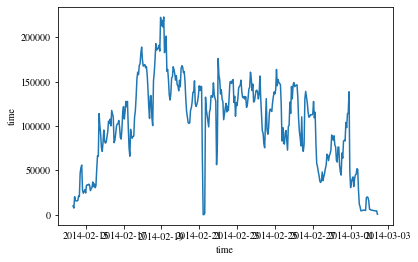

In [112]:
data=df_tpp.resample('H',on='time').count()
sns.lineplot(data=data, x=data.index, y='time')

In [111]:
df_tpp.describe()

,time,user,text,entry type
count,39599436,39599436,39599436,39599436
unique,902939,1813561,1334353,3
top,2014-02-17 01:15:00,bas3dh3l1x,,text
freq,7137,18328,23434454,16165021
first,2014-02-14 08:16:19,NaN,NaN,NaN
last,2014-03-02 10:05:24,NaN,NaN,NaN
